# Rough-N

## Import library/package yang dibutuhkan

In [19]:
import pandas as pd
import re

## Load data

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/dennywr/cobaprosaindata/main/news_media_indonesia_politik_dan_hukum.csv')

In [21]:
df = pd.DataFrame(data)
df

,Unnamed: 0,Judul,Isi
0,0,Formappi: Kinerja DPR Memburuk Jelang Pemilu,"None ""Kinerja buruk dalam fungsi legislasi DP..."
1,1,"Diduga Kuat Langgar Kode Etik, MAKI Minta Dewa...","None ""Kalau berdasarkan kode etik ya menurut ..."
2,2,"Jokowi Makan Siang Bersama 3 Capres, Pengamat ...","None Menanggapi itu, pengamat politik dari Un..."
3,3,Prabowo-Gibran Disebut Pasangan Ideal untuk Me...,None None “Pak Prabowo sebagai senior dan pah...
4,4,Koalisi Indonesia Maju Pilih Gibran untuk Beri...,SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5,5,Program BLT El Nino Dinilai Telat dan Bisa Tim...,None Dekan Fakultas Ekonomi dan Bisnis (FEB) ...
6,6,Politisi PDIP: Gibran Bukan Contoh Bagus untuk...,"None ""Mas Gibran sosok contoh tidak bagus unt..."
7,7,Gibran Rakabuming Raka Dinilai tidak Tegak Lur...,"None None None None “Tidak ada loyalitas, tid..."
8,8,"KPU Digugat Rp70,5 Triliun Efek Terima Gibran ...","None Dalam gugatannya, KPU RI dituntut untuk ..."
9,9,Ganjar Klaim tak Ada Pembahasan Gibran Saat Ma...,"None ""Tidak, tidak, tidak (ada pembahasan soa..."


In [22]:
df['Isi'] = df['Isi'].fillna('').astype(str)

## Preprocessing

- Hapus karakter spesial pada teks

In [23]:
def removeSpecialText (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"").replace('None',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Isi'] = df['Isi'].apply(removeSpecialText)
print(df['Isi'])

0       "Kinerja buruk dalam fungsi legislasi DPR ta...
1       "Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu, pengamat politik dari Univer...
3        ?Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis (FEB) Univ...
6       "Mas Gibran sosok contoh tidak bagus untuk a...
7          ?Tidak ada loyalitas, tidak ada disiplin,...
8       Dalam gugatannya, KPU RI dituntut untuk memb...
9       "Tidak, tidak, tidak (ada pembahasan soal Gi...
10      "Saya pikir bagus itu apapun juga fungsi per...
11      "Kita percaya, memang harus percaya. Paling ...
12      Kepala Pusat Penerangan (Kapuspen) TNI Laksd...
13     CALON Presiden (Capres) dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15      "Kami tadi sampaikan kepada beliau kami seri...
16      "Saya berharap makan siang hari ini, adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Hapus tanda baca pada teks

In [24]:
def removePunctuation(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text

df['Isi'] = df['Isi'].apply(removePunctuation)
df['Isi'].head(20)

0        Kinerja buruk dalam fungsi legislasi DPR ta...
1        Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu  pengamat politik dari Univer...
3         Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis  FEB  Univ...
6        Mas Gibran sosok contoh tidak bagus untuk a...
7           Tidak ada loyalitas  tidak ada disiplin ...
8       Dalam gugatannya  KPU RI dituntut untuk memb...
9        Tidak  tidak  tidak  ada pembahasan soal Gi...
10       Saya pikir bagus itu apapun juga fungsi per...
11       Kita percaya  memang harus percaya  Paling ...
12      Kepala Pusat Penerangan  Kapuspen  TNI Laksd...
13     CALON Presiden  Capres  dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15       Kami tadi sampaikan kepada beliau kami seri...
16       Saya berharap makan siang hari ini  adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Hapus angka pada teks

In [25]:
def removeNumbers (text):
  return re.sub(r"\d+", "", text)
df['Isi'] = df['Isi'].apply(removeNumbers)
df['Isi']

0        Kinerja buruk dalam fungsi legislasi DPR ta...
1        Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu  pengamat politik dari Univer...
3         Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis  FEB  Univ...
6        Mas Gibran sosok contoh tidak bagus untuk a...
7           Tidak ada loyalitas  tidak ada disiplin ...
8       Dalam gugatannya  KPU RI dituntut untuk memb...
9        Tidak  tidak  tidak  ada pembahasan soal Gi...
10       Saya pikir bagus itu apapun juga fungsi per...
11       Kita percaya  memang harus percaya  Paling ...
12      Kepala Pusat Penerangan  Kapuspen  TNI Laksd...
13     CALON Presiden  Capres  dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15       Kami tadi sampaikan kepada beliau kami seri...
16       Saya berharap makan siang hari ini  adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Ubah semua huruf pada teks menjadi huruf kecil

In [26]:
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['Isi'] = df['Isi'].apply(casefolding)
df['Isi']

0        kinerja buruk dalam fungsi legislasi dpr ta...
1        kalau berdasarkan kode etik ya menurut saya...
2       menanggapi itu  pengamat politik dari univer...
3         pak prabowo sebagai senior dan paham di bi...
4      sekjen pdi perjuangan hasto kristiyanto menye...
5       dekan fakultas ekonomi dan bisnis  feb  univ...
6        mas gibran sosok contoh tidak bagus untuk a...
7           tidak ada loyalitas  tidak ada disiplin ...
8       dalam gugatannya  kpu ri dituntut untuk memb...
9        tidak  tidak  tidak  ada pembahasan soal gi...
10       saya pikir bagus itu apapun juga fungsi per...
11       kita percaya  memang harus percaya  paling ...
12      kepala pusat penerangan  kapuspen  tni laksd...
13     calon presiden  capres  dari koalisi perubaha...
14      pada kunjungan ini delegasi bksap dpr ri mel...
15       kami tadi sampaikan kepada beliau kami seri...
16       saya berharap makan siang hari ini  adalah ...
17       presiden mengatakan pemda yang tidak ne

- Deteksi slank words (kata-kata yang tidak baku)

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# Membuat kamus slang words dan kata Indonesia yang benar
slang_dict = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin","sdh":"sudah","pernh":"pernah","pnya":"punya", "syulitttt":"sulit", "jelass":"jelas","mu":"kamu", "and":"dan","pingin":"ingin", "kenerjanya":"kenerjanya","tmb":"tambah","dpat":"dapat","ttp":"tetap","lm":"lama", "majuterus":"maju terus","idonesia":"indonesia","menugumu":"menunggumu", "eloe":"kamu", "rja":"kerja", "so":"pasti","anes":"anies"}

In [29]:
# Membuat fungsi untuk mengubah slang words menjadi kata Indonesia yang benar,
def replaceSlangWords(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# Memasukan Kata yang telah di clean ke dalam fungsi deteksi slang words
slang_words=[]
for i in range(len(df['Isi'])):
  slang = replaceSlangWords(df['Isi'][i])
  slang_words.append(slang)

data_slang = pd.DataFrame(slang_words, columns=["Slang Word Corection"])
data_slang

,Slang Word Corection
0,kinerja buruk fungsi legislasi dpr minimnya pr...
1,berdasarkan kode etik iya melanggar pimpinan k...
2,menanggapi pengamat politik universitas al azh...
3,prabowo senior paham bidang pertahanan mas gib...
4,sekjen pdi perjuangan hasto kristiyanto menyeb...
5,dekan fakultas ekonomi bisnis feb universitas ...
6,mas gibran sosok contoh bagus anak muda gibran...
7,loyalitas disiplin ikhlas djarot dialog politi...
8,gugatannya kpu ri dituntut membayar kerugian m...
9,pembahasan gibran ganjar istana kepresidenan j...


In [30]:
finalResult = pd.DataFrame(slang_words, columns=["Slang Word Corection"])

## Matriks Koherensi

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Membuat objek CountVectorizer
vectorizer = CountVectorizer()

# Menghitung term frequency
X = vectorizer.fit_transform(finalResult["Slang Word Corection"][0:1])
print(X)

print([finalResult["Slang Word Corection"][0]])
print([finalResult["Slang Word Corection"][1]])

term = vectorizer.get_feature_names_out()

# Menghitung matriks koherensi
matriks_koherensi = (X.T * X)

# Membuat DataFrame
df = pd.DataFrame(matriks_koherensi.toarray(), index=term, columns=term)

df


  (0, 43)	5
  (0, 8)	4
  (0, 26)	3
  (0, 50)	1
  (0, 20)	16
  (0, 64)	1
  (0, 83)	1
  (0, 104)	2
  (0, 106)	1
  (0, 12)	1
  (0, 37)	1
  (0, 60)	1
  (0, 3)	1
  (0, 84)	1
  (0, 82)	1
  (0, 100)	1
  (0, 38)	1
  (0, 75)	1
  (0, 4)	2
  (0, 72)	1
  (0, 25)	4
  (0, 0)	7
  (0, 86)	1
  (0, 46)	1
  (0, 76)	1
  :	:
  (0, 52)	1
  (0, 87)	1
  (0, 62)	1
  (0, 9)	1
  (0, 54)	1
  (0, 80)	1
  (0, 105)	1
  (0, 79)	2
  (0, 21)	2
  (0, 70)	3
  (0, 39)	2
  (0, 24)	2
  (0, 93)	1
  (0, 42)	1
  (0, 68)	1
  (0, 35)	1
  (0, 88)	1
  (0, 58)	1
  (0, 92)	1
  (0, 109)	1
  (0, 65)	1
  (0, 28)	1
  (0, 47)	1
  (0, 45)	1
  (0, 63)	1
['kinerja buruk fungsi legislasi dpr minimnya produk undang undang uu dihasilkan kelatahan dpr mengutak atik prolegnas prioritas tata kelola perencanaan buruk berdampak kinerja buruk peneliti formappi albert purwa konferensi pers evaluasi kinerja dpr sidang i sidang jelang pemilu dpr lemah jakarta senin oktober formappi mencatat komisi komisi dpr kuantitas kali rapat komisi iv rapat kali ko

,albert,anggota,anjuran,atik,berdampak,berdasarkan,berjuang,bersifat,buruk,buruknya,...,tata,terpilih,tertutup,tingkat,undang,unsur,uu,viii,virtual,wakil
albert,49,35,7,7,14,7,7,7,28,7,...,7,7,21,14,14,7,7,7,14,7
anggota,35,25,5,5,10,5,5,5,20,5,...,5,5,15,10,10,5,5,5,10,5
anjuran,7,5,1,1,2,1,1,1,4,1,...,1,1,3,2,2,1,1,1,2,1
atik,7,5,1,1,2,1,1,1,4,1,...,1,1,3,2,2,1,1,1,2,1
berdampak,14,10,2,2,4,2,2,2,8,2,...,2,2,6,4,4,2,2,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unsur,7,5,1,1,2,1,1,1,4,1,...,1,1,3,2,2,1,1,1,2,1
uu,7,5,1,1,2,1,1,1,4,1,...,1,1,3,2,2,1,1,1,2,1
viii,7,5,1,1,2,1,1,1,4,1,...,1,1,3,2,2,1,1,1,2,1
virtual,14,10,2,2,4,2,2,2,8,2,...,2,2,6,4,4,2,2,2,4,2


In [32]:
!pip install rouge

In [33]:
from rouge import Rouge

# Contoh hipotesis dan referensi
hipotesis = [finalResult["Slang Word Corection"][0]]
referensi = [finalResult["Slang Word Corection"][1]]

# Membuat objek Rouge
rouge = Rouge()

# Menghitung skor ROUGE
scores = rouge.get_scores(hipotesis, referensi)

print(scores)


[{'rouge-1': {'r': 0.08163265306122448, 'p': 0.035398230088495575, 'f': 0.04938271182975192}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.061224489795918366, 'p': 0.02654867256637168, 'f': 0.03703703281740637}}]


### Penjelasan output:

rouge-1: Mengukur sejauh mana unigram (kata tunggal) dalam teks hipotesis cocok dengan unigram dalam teks referensi.


rouge-2: Mengukur sejauh mana bigram (dua kata yang berurutan) dalam teks hipotesis cocok dengan bigram dalam teks referensi.


rouge-l: Mengukur sejauh mana longest common subsequence (subsequence terpanjang yang sama) dalam teks hipotesis cocok dengan teks referensi.
Untuk setiap metrik di atas, ada tiga nilai yang dihasilkan:

- r (recall): Proporsi n-gram dalam teks referensi yang juga muncul dalam teks hipotesis.
- p (precision): Proporsi n-gram dalam teks hipotesis yang juga muncul dalam teks referensi.
- f (F1 score): Rata-rata harmonik dari recall dan precision, memberikan ukuran yang seimbang antara keduanya.


Misalnya, untuk rouge-1, recall adalah 0.0816, precision adalah 0.0354, dan F1 score adalah 0.0494. Ini berarti bahwa sekitar 8.16% dari kata-kata dalam teks referensi juga muncul dalam teks hipotesis, sekitar 3.54% dari kata-kata dalam teks hipotesis juga muncul dalam teks referensi, dan F1 score (yang merupakan rata-rata harmonik dari recall dan precision) adalah 0.0494. Nilai-nilai yang sama juga berlaku untuk rouge-2 dan rouge-l, tetapi dengan n-gram yang berbeda (bigram untuk rouge-2 dan longest common subsequence untuk rouge-l).

## Graph (NetworkX)

Graph adalah jenis struktur data umum yang susunan datanya tidak berdekatan satu sama lain (non-linier). Graph terdiri dari kumpulan simpul berhingga untuk menyimpan data dan antara dua buah simpul terdapat hubungan saling keterkaitan. Simpul pada graph disebut dengan verteks (V), sedangkan sisi yang menghubungkan antar verteks disebut edge (E). Graf digunakan untuk merepresentasikan objek-objek diskrit dan hubungan antara objek-objek tersebut. Dalam bahasa sehari-hari, sebuah graf adalah himpunan dari objek-objek yang dinamakan titik, simpul, atau sudut dihubungkan oleh penghubung yang dinamakan garis atau sisi.

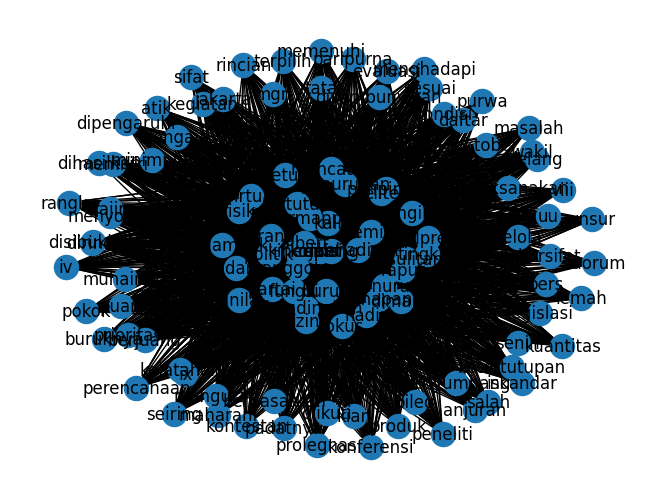

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek grafik
G = nx.Graph()

# Menambahkan simpul dan tepi ke grafik
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i, j] > 1:
            G.add_edge(df.columns[i], df.columns[j], weight=df.iloc[i, j])

# Menggambar grafik
nx.draw(G, with_labels=True)
plt.show()


## Closeness Centrality

Closeness Centrality adalah ukuran sentralitas dalam jaringan, dihitung sebagai balikan dari jumlah panjang jalur terpendek antara simpul dan semua simpul lainnya dalam grafik. Dengan kata lain, semakin sentral sebuah simpul, semakin dekat ia dengan semua simpul lainnya. Closeness Centrality digunakan untuk mendeteksi simpul yang mampu menyebarkan informasi dengan sangat efisien melalui grafik. Berikut merupakan rumus untuk menghitung closeness centrality:


$C(u) = \frac{1}{\sum_{v=1}^{n} d(u, v)}$


Dimana:

- $C(u)$ adalah closeness centrality dari node $u$


- $d(u,v)$  adalah jarak terpendek antara node $u$ dan $v$

In [35]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mencetak hasil
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node albert: Closeness Centrality = 1.0
Node anggota: Closeness Centrality = 1.0
Node anjuran: Closeness Centrality = 0.6089385474860335
Node atik: Closeness Centrality = 0.6089385474860335
Node berdampak: Closeness Centrality = 1.0
Node berdasarkan: Closeness Centrality = 0.6089385474860335
Node berjuang: Closeness Centrality = 0.6089385474860335
Node bersifat: Closeness Centrality = 0.6089385474860335
Node buruk: Closeness Centrality = 1.0
Node buruknya: Closeness Centrality = 0.6089385474860335
Node daftar: Closeness Centrality = 0.6089385474860335
Node dibandingkan: Closeness Centrality = 1.0
Node dihasilkan: Closeness Centrality = 0.6089385474860335
Node diikuti: Closeness Centrality = 0.6089385474860335
Node dimana: Closeness Centrality = 1.0
Node dinilai: Closeness Centrality = 1.0
Node dipengaruhi: Closeness Centrality = 0.6089385474860335
Node dirinci: Closeness Centrality = 0.6089385474860335
Node disembunyikan: Closeness Centrality = 0.6089385474860335
Node disibukkan: Close